In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

## Get the data

In [3]:
col=["user_id","item_id","rating","Timestamp"]
df=pd.read_csv("u.data",sep="\t",names=col)

In [4]:
df.head()

,user_id,item_id,rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
?pd.merge

In [6]:
df1=pd.read_csv("u.item",sep="\|",engine='python',header=None,usecols=[0,1],names=["item_id","movie_name"])
df=pd.merge(df,df1,on=["item_id"])
df.head()

,user_id,item_id,rating,Timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# EXPLORATORY ANALYSIS

In [72]:
ratings=pd.DataFrame(df.groupby("movie_name").mean()["rating"])
ratings["no_of_users"]=df.groupby("movie_name")["user_id"].count()
#ratings.columns=["a","b"]
ratings.head()

,rating,no_of_users
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


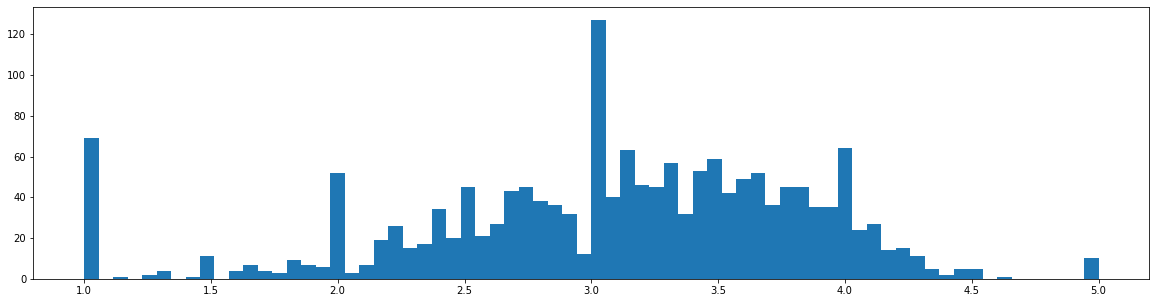

In [78]:
plt.figure(figsize=(20,5))
plt.hist(ratings["rating"],bins=70)
plt.show()

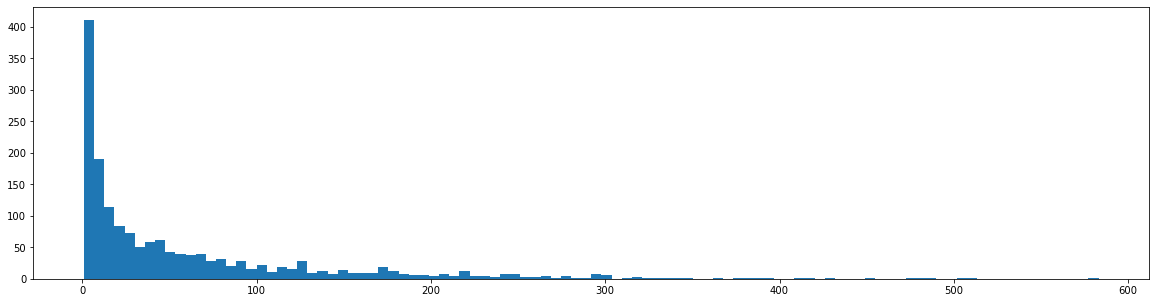

In [77]:
plt.figure(figsize=(20,5))
plt.hist(ratings["no_of_users"],bins=100)
plt.show()


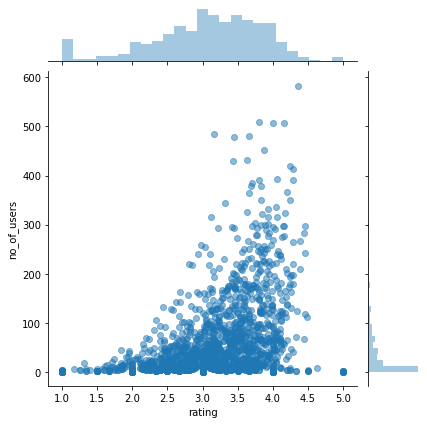

In [51]:
sns.jointplot(x="rating",y="no_of_users",data=ratings,alpha=0.5)

# building RS

In [54]:
df.head()

,user_id,item_id,rating,Timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [71]:
movie_matrix=df.pivot_table(index="user_id",columns="movie_name",values="rating")
movie_matrix.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [65]:
ratings["no_of_users"].sort_values(ascending=False).head()

movie_name
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: no_of_users, dtype: int64

In [80]:
#now let us search for a movie and find its users correlation

star_war=movie_matrix["Star Wars (1977)"]
star_war.head()


user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [97]:
#lets finde correlation of other movies with a given  movie
#for eg: correlation will be given on the basis of how much a user who have watched starwars , rated other movies
similar_to_starwars=movie_matrix.corrwith(star_war)

similar_to_starwars[0:].dropna().sort_values(ascending=False).head()

movie_name
No Escape (1994)          1.0
Man of the Year (1995)    1.0
Hollow Reed (1996)        1.0
Commandments (1997)       1.0
Cosi (1996)               1.0
dtype: float64

In [104]:
#we see movies having corr 1 but arent watched by many user
similar=pd.concat([similar_to_starwars,ratings["no_of_users"]],axis=1)
similar.columns=['correlation','no_of_users']
similar[similar['no_of_users']>100]["correlation"].dropna().sort_values(ascending=False).head()

movie_name
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.747981
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Name: correlation, dtype: float64

In [114]:
def recommend_similar_movie(movie):
    rating_movie=movie_matrix[movie]
    print("similar movies to"+movie)
    similar_to_movie=movie_matrix.corrwith(rating_movie).dropna()
    #we see movies having corr 1 but arent watched by many user
    similar=pd.concat([similar_to_movie,ratings["no_of_users"]],axis=1)
    similar.columns=['correlation','no_of_users']
    print(similar[similar['no_of_users']>100]["correlation"].dropna().sort_values(ascending=False).head())

In [115]:
recommend_similar_movie("Star Wars (1977)")

similar movies toStar Wars (1977)
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.747981
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Name: correlation, dtype: float64
